# Utils Functions and Tests

In [2]:
#import binary_tools
from kicks import*
from test_kicks import*
from Keplers_laws import*
from binary_tools.testing_circular_function import*
from binary_tools.utils.tests.run_tests import*
from binary_tools.utils.orbits import*

ImportError: No module named kicks

## kicks

The kicks file contains a series of functions that randomly sample vaules to create both the kick magnitude and direction, and another seriers of functions that makes a preditions of the final system post kick. 

The first is rand_phi() which samples the spherical coordinate phi from 0 to 2pi. The second is rand_theta() which samples the spherical coordinate theta from 0 to pi. The last is rand_velocity(sigma) which accepts a value sigma and returns a random velocity sampled from a maxwellian distribution.

phi follows the distribution:

$$f(x) = 1$$

In [2]:
phi = rand_phi()

theta follows the distribution:

$$f(x) = \frac{1}{2*\sin(theta)}$$

In [3]:
theta = rand_theta()

the velocity follows the maxwellian distribution:

$$f(v) = (\frac{2}{\pi*sigma^2})^{(\frac{-1}{2})}*e^{\frac{-v^2}{(2*sigma^2)}}$$

In [4]:
velocity = rand_velocity(100)

The following function created is a function that accepts initial conditions on a circular binary system and returns the final semi-major axis, final eccentricity, the angle between the pre and post explosion orbital planes, and a boolean describing if the orbit is unbound

In [5]:
post_explosion_params_circular(133, 5.5, 55, 1.4, theta, phi, velocity)

(114.49776972278259, 0.34251995830882087, 0.12137451558702658, True)

To consider a non circular system, a series of functions were created to sample an eccentric system with a kick. The first function finds a random true anomaly of the system, then the second uses that true anomaly to find the separation of the system.

In [6]:
sample_e = 0.2

the true anomaly follows the distribution:

$$f(x) = \sqrt{\frac{1}{4\pi}}*\frac{(1-e^2)^{1.5}}{(1+e*\cos(u))^2}$$

where u is the true anomaly and e is the eccentricity

In [7]:
true_anomaly = rand_true_anomaly(sample_e)

the separation is calculated from the following equation:
    
$$f(x) = \frac{A*(1 - e^2)}{1+e*\cos(u)}$$

where A is the semi-major axis, u is the randomly sampled true anomaly, and e is the eccentricity

In [8]:
rand_separation(sample_e,133)

157.89490342616384

The last part of the eccentric series is a function that accepts the initial contitions of an eccentric system, then returns final semi-major axis, final eccentricity, and a boolean describing if the orbit is unbound

In [9]:
post_explosion_params_general( 133, 5.5, 55, 1.4, sample_e, theta, phi, velocity, true_anomaly)

(119.50688273593055, 0.38058228690114893, True)

## test kicks

Test kicks is a file containing a series of tests for the functions in kicks.

The first set of functions the compare the distributions created from sampling the functions in kicks.py to the expected distributions. In the process a graph is created and saved by default, in the following examples this feature is altered so the graph is showen but not saved.

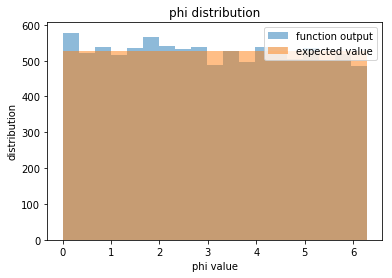

True

In [10]:
test_rand_phi(num_sample=10000, nbins=20, tolerance = 1e-3, seed="Jean", plot=True, save=False)

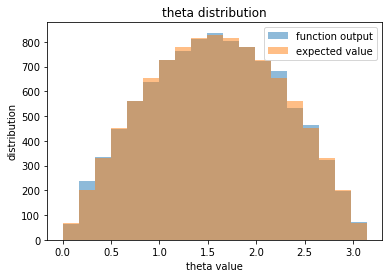

True

In [11]:
test_rand_theta(num_sample=10000, nbins=20, tolerance = 1e-3, seed="Jubilee", plot=True, save=False)

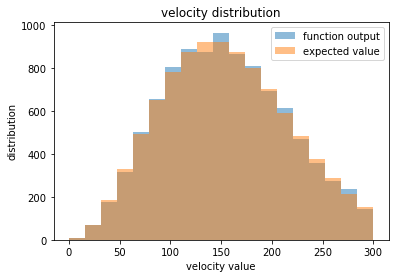

True

In [12]:
test_rand_velocity(100, num_sample=10000, nbins=20, tolerance=1e-3, seed="Dimitris", plot=True, save=False)

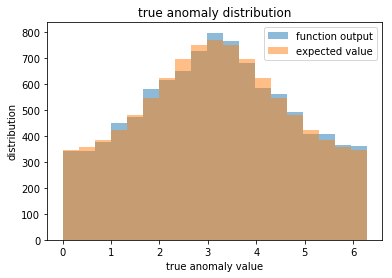

True

In [13]:
test_rand_true_anomaly(sample_e,num_sample=10000, nbins=20, tolerance = 1e-3, seed="Rhysand",\
                       plot=True, save=False)

binary_tools/utils/Keplers_laws.py:33: RuntimeWarning: invalid value encountered in sqrt
  period = np.sqrt(4*np.pi**2*(semi_major_axis**3)/(cgrav*(mass_1+mass_2)))/(3600*24)


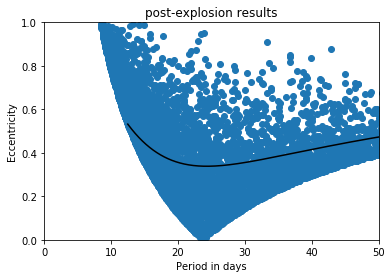

'True'

In [14]:
testing_circular_function_graph(test_sigma=100,test_M1=5.5,test_M2=55,test_Ai=133,\
            test_Mns=1.4,seed="Flay",sample_velocity=100,npoints=10000,plot=True,save=False)

In order to fully test post_explosion_params_circular function, a second function was created in addition to testing_circular_function_graph which works by comparing the momentum calculated from that fuction, to a momentum calculated from other known values.

In [15]:
testing_circular_function_momentum(Ai=133, M1=5.5, M2=55, Mns=1.4, test_sigma=100,\
                                   num_sample=1000,seed = "Lela", tolerance=1e-3)

True

A second version of the momentum test and the graph test were needed after the post_explosion_params_general function was created to test that function. These slightly modified functions accept the post_explosion_params_general function with an intial eccentricity of zero. the results they produce are very similar to the original circular tests.

Another function was created to test the post_explosion_params_general function. This function calculates the kick needed to force the eccentric system into a circular one then plugs those results into post_explosion_params_general to make sure the end eccentricity is zero.

In [16]:
testing_eccentric_kick(Ai=133, M1=5.5, M2=55, Mns=1.4, num_sample=100, seed = "Guarnaschelli")

binary_tools/utils/kicks.py:186: RuntimeWarning: invalid value encountered in sqrt
  V_radius = np.sqrt(cgrav*(M1+M2)*(2/separation-1/Ai-Ai*(1-e**2)/(separation**2)))


True

An additional test was created for the post_explosions_params_general function that kicks a circular system with mass loss, then reverses that with mass gain back into a circular orbit

In [17]:
testing_inverse_kick(Ai=133, M1=5.5, M2=55, Mns=1.4, test_sigma=1000, num_sample=100,\
                                                    seed="Tamlin",tolerance=1e-4)

True

A full version of the momentum test was also created to test the post_explosion_params_general in the case of an initial eccentric orbit. The momentum is calculated in a slightly different method from the previous momentum funcitons.

In [18]:
testing_momentum_full_eccentric(Ai=133, M1=5.5, M2=55, Mns=1.4, test_sigma=15,num_sample=100,\
                                seed="Lucien",tolerance=1e-4)

True

## Run tests

This is a file containing a function that runs all the tests in the test_kicks file at once and saves any graphs that are created in the process.

## Orbits

This file contains small functions that are used repeatedly thoughout larger blocks of code. The first is an angular momentum calculator, using the equation 

$$L = M1*Msun*M2*Msun*\sqrt{cgrav*A*Rsun*(1-e^2)/((M1+M2)*Msun)}$$

where L is the angular momentum, M1 and M2 are the masses of a binary system in solar masses, A is the semi-major axis, Msun is the mass of the sun, Rsun is the radius of the sun, and cgrav is the gravitational constant

In [19]:
angular_momentum(133,5.5,55,sample_e)

2.6572192836451168e+54

The second function is used to calculate the separation between two mass given the semi-major axis, the eccentricity, and the true anomaly. The following equation was used

$$separation = \frac{A*(1 - e^2)} {1+e*\cos(u)}$$

where A is the semi-major axis and u is the true anomaly

In [20]:
separation_function(133,sample_e,true_anomaly)

111.34699445841888